In [137]:
import pandas as pd
import numpy as np
import glob
import csv
import os
import seaborn as sns


#### read all the Files and combine them into One file

In [13]:
files=[file for file in os.listdir('E:/DataScience/PROJECT DATA/SALE ANALYSIS/')]

In [15]:
all_month=pd.DataFrame()

In [16]:
for file in files :
    df=pd.read_csv('E:/DataScience/PROJECT DATA/SALE ANALYSIS/'+file)
    all_month=pd.concat([all_month,df])


In [18]:
all_month.to_csv("E:/DataScience/PROJECT DATA/SALE ANALYSIS/all_month.csv", index=False)


#### clean the data

In [21]:
nullData=all_month[all_month.isna().any(axis=1)]

In [22]:
all_month=all_month.dropna()

In [23]:
all_month.shape

(186305, 6)

In [24]:
all_month['month']=all_month['Order Date'].str[0:2]

<ipython-input-24-7088fab75e2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_month['month']=all_month['Order Date'].str[0:2]


In [25]:

all_month=all_month[all_month['month']!='Or']

In [26]:
all_month[all_month.apply(lambda row: row['month']=='Or', axis=1)]

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, month]
Index: []

In [27]:
all_month['month']=all_month['month'].astype('int32')

In [30]:
all_month[all_month['Price Each'].isna()]

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, month]
Index: []

#### in which month the sales reach its maximum

In [31]:
all_month['Quantity Ordered']=pd.to_numeric(all_month['Quantity Ordered'])
all_month['Price Each']=pd.to_numeric(all_month['Price Each'])



In [32]:
all_month['total_cost']=all_month['Quantity Ordered']*all_month['Price Each']

In [35]:
result=all_month.groupby('month').sum()

In [135]:
import matplotlib.pyplot as plt

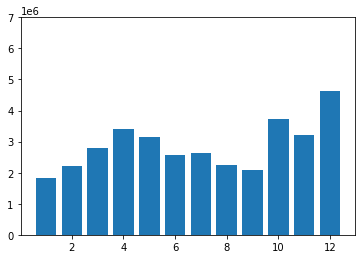

In [33]:
month=range(1,13)
plt.bar(month,result['total_cost'])
# plt.xticks=month
# plt.set_xlabel("2013", fontsize=12)

plt.ylim(0,7000000)
plt.ylabel="dollar"
plt.xlabel="month"



#### which city buy most ?

In [37]:
all_month['city']=all_month['Purchase Address'].apply(lambda x: x.split(',')[1]+"("+x.split(',')[2].split(" ")[1]+')')

In [38]:
result2=all_month.groupby('city').sum()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


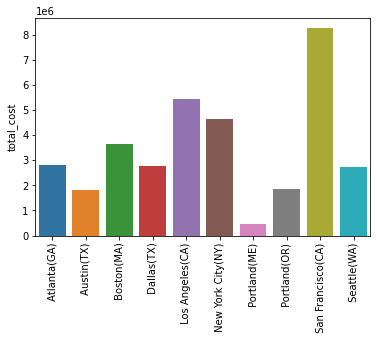

In [148]:
cities=[city for city, df in all_month.groupby('city')]
ax=sns.barplot(cities,result2['total_cost'])
ax.set_xticklabels(cities,rotation=90)
plt.show()


###### best time for advertising during the day ?

In [40]:
all_month['hour']=pd.to_datetime(all_month['Order Date']).dt.hour

In [41]:
all_month['minute']=pd.to_datetime(all_month['Order Date']).dt.minute


In [42]:
result=all_month.groupby("hour").count()

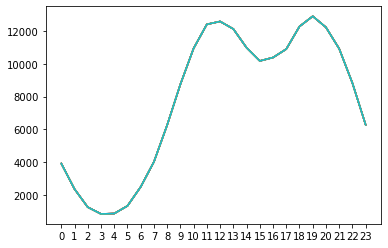

In [51]:
hours=[hours for hours,df in all_month.groupby('hour')]
plt.plot(hours,result)
plt.xticks(hours)
plt.show()

#### which two products have been selled together most ?

In [153]:
duplicatedRows=all_month[all_month.duplicated('Order ID', keep=False)]


In [154]:
duplicatedRows["pair orders"]=duplicatedRows.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-154-16eaf2fa72ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicatedRows["pair orders"]=duplicatedRows.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [156]:
from itertools import combinations
from collections import Counter
counter=Counter()

for row in duplicatedRows['pair orders']:
    rowlist=row.split(',')
    counter.update(Counter(combinations(rowlist,2)))


In [ ]:
#counter.most_common(10)

##### what product selled the most ? why do you think it is sold the most ?


In [157]:
mostOrderedDF=duplicatedRows.groupby('Product').sum('Quantity Ordered')

In [159]:
# mostOrderedDF[mostOrderedDF['Quantity Ordered']==mostOrderedDF['Quantity Ordered'].max()]
# mostOrdereditemRow


In [99]:
temp=duplicatedRows.groupby('Product')

In [161]:
products=[Product for Product,df in temp ]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


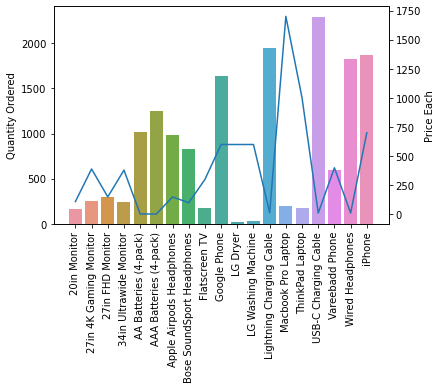

In [160]:
prices=duplicatedRows.groupby('Product').mean()['Price Each']
import seaborn as sns
ax=sns.barplot(products,mostOrderedDF['Quantity Ordered'])
ax.set_xticklabels(g.get_xticklabels(), rotation=90)
ax2 =ax.twinx()
ax2=sns.lineplot(data=prices)

plt.show()